In [1067]:
## BLOCK 1 OF CODE _ reads the counter log file during workload execution and then captures the lines 

import pandas as pd
import matplotlib.pyplot as plt

linux = True
windows = not linux

if linux: 
    # Load the data from the provided file
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_12_Summary_tmaL1_schedutil.txt'  #tmal3mem  - very highest correlation !!  - case 1 
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_28_L1cacheThrashing_ondemand_attempt2.txt' # Case 1b ->  Moderately correlating to the CacheMisses group events  
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_10_Summary_tmaL1_matrixthreads1_schedutil.txt' # single threaded matrix operation with tmal1 - case 2 - very low correlation ! 
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_35_Summary_tmaL1_matrixthreads2_ondemand.txt' #case 2b, with 2 threads 
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_36_Summary_tmaL1_matrixthreads3_ondemand.txt' #case 2c, with 3 threads 
        #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_37_Summary_tmaL3Mem_matrixthreads3_ondemand.txt' # case 2d, with 3 threads, tmal3mem dumps.=> something wrong - temperature > 90 all the time.
        #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_38_Summary_tmaL1_matrixthreads5_ondemand.txt'# case 2e, with 5 threads, tmal1 dumps [ not good - drop , temp > 90 all the time for no reason ]
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_41_Summary_tmaL3mem_matrixthreads5_ondemand.txt'# case 2e, with 5 threads, tmal1 dumps.
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_39_Summary_tmaL1_matrixthreads9_ondemand.txt' # case 2f, with 9 threads, tmal1 dumps.  DROP NO CORRELATION HERE !
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_40_Summary_tmaL3Mem_matrixthreads9a_ondemand.txt'# case 2g, with 9 threads, tmal3mem dumps!
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_15_branchMisses_schedutil_attempt1.txt' #branch prediction errors forced - very high correlation - case 3 (Block 4 has highest correlation)
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_5_pipeline_schedutil.txt' #dump pipeline counters - case 4
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_30_LLC_Affinity_ondemand_attempt1.txt' # case 5a (Block 3 an 4) affinity - not much correlating = meaning the LLC Cache affinity workload is not percolating to the error on "Cache" Counters
    file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_31_LLC_Affinity_ondemand_attempt2.txt' # case 5b -  affinity - Moderate to high correlation  = meaning the LLC Cache affinity correlates to TmaL3Mem counters !!
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_17_AVX_FPU_SSE_schedutil.txt' # instruction set over the stress workload, TopdownL5 - case 6
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_18_AVX_FPU_SSE_schedutil_attempt2.txt' # here we selected set of new counter sets from TMA which are a group tma_L5_group - case 7
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_19_Cache_Tests.txt' # cache intensive workloads - case 8
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_20_Cache_Tests_attempt2.txt' # cache intensive workloads - case 8b - very poor correlation
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_21_Cache_Tests_attempt3.txt' # cache intensive workloads - case 8c - very poor correlation
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_22_Cache_Tests_attempt4.txt' # cache intensive workloads - case 8d - very poor correlation
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_23_Cache_Tests_attempt5.txt' # cache intensive workloads - case 8d - very poor correlation
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_24_Cache_Tests_attempt6.txt' # cache intensive workloads - case 8d - somewhat ok correlation
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_25_Cache_Tests_attempt7.txt' # cache intensive workloads - case 8d - poor-correlation to TmaL1
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_26_Cache_Tests_attempt8.txt' # cache intensive workloads - case 8d - poor-correlation to TmaL3Mem
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_13_Summary_tmaL2_schedutil.txt' #summary, tmal1   - high correlation !! - case 9
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_32_lsearch_TmaL3Mem_ondemand_attempt1.txt' #- high correlation = case 10a - Block4
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_33_lsearch_memory_ondemand_attempt2.txt'  # Block 3 with memory stats regsitered
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_27_L1cacheThrashing_ondemand_attempt1.txt' #not correlating to the TMAL1 and Summary events
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_29_L1cacheThrashing_monitoringL2Behav_ondemand_attempt3.txt' # No case set  - not correlating - OMIT FOR NOW 
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_34_SchedMix_Stress_memory_ondemand_attempt1.txt'
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_42_Summary_cachemisses_permite8_ondemand.txt' # Permute 8 - cache misses will be hit.
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_43_L1L2L3_workloadmix16_ondemand.txt' # correlating very well to the main tma counters in pipeline.
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_44_Vanila_workloadmix16_ondemand.txt'
    
    
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_45_VanilaPower_workloadmix16_ondemand.txt'  # power has been added to vanila (nice correlation)
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_46_Power_and_branchmispred_l1_LLC_ondemand.txt' # power and L1, LLC for branch mispred (similar to 15) 
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_47_CompositePower_workloadmix16_ondemand.txt'
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_48_CompositePower_Lsearch16_ondemand.txt'
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_49_CompositePower_branch16_ondemand.txt'
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_50_CompositePower_FPOperations_ondemand.txt'
    
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_51_CompositePower_Matrix_2_ondemand.txt' #also added l2 performance 
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_52_CompositePower_Matrix_5_ondemand.txt'
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_53_CompositePower_Matrix_12_ondemand.txt'

    ## added to the below L2 stats also. 
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_54_CompositePower_LLC-Affinity_8_ondemand.txt'  # this is only matrix 5. not llc-affinity
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_55_CompositePower_LLC-Affinity_16_ondemand.txt'
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_56_CompositePower2_LLC-Affinity_16_ondemand.txt'
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_57_CompositePower2_LLC-Affinity_16_ondemand.txt'
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_58_CompositePower2_CPU_8_LLC-Affinity_8_ondemand.txt'
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_59_CompositePower2_CPU_8_Matrix_2_LLC-Affinity_8_ondemand.txt' #(High correlation)
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_60_CompositePower2_CPU_8_Cache_8_ondemand.txt' #(High correlation)
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_61_CompositePower2_CPU_12_Schedmix_8_ondemand.txt' #(Low accuracy, high correlation)
    #file_path = '/home/drdang/phD/thesis/tools/perf/stress_computeCounters_62_CompositePower2_CPU_12_Permute_8_ondemand.txt' #(XG High accuracy, high correlation)


    #file_path = '/home/drdang/phD/thesis/tools/perf/test.txt'

if windows:
    # Load the data from the provided file
    #file_path = '.\perftestcoverage\stress_computeCounters_12_Summary_tmaL1_schedutil.txt'  #tmal3mem  - very highest correlation !!  - case 1 
    #file_path = '.\perftestcoverage\stress_computeCounters_28_L1cacheThrashing_ondemand_attempt2.txt' # Case 1b ->  Moderately correlating to the CacheMisses group events  
    #file_path = '.\perftestcoverage\stress_computeCounters_10_Summary_tmaL1_matrixthreads1_schedutil.txt' # single threaded matrix operation with tmal1 - case 2 - very low correlation ! The good point here is that - we have a single thread matrix whihc can take higher frequency to finish but not taking !
    #file_path = '.\perftestcoverage\stress_computeCounters_35_Summary_tmaL1_matrixthreads2_ondemand.txt' #case 2b, with 2 threads 
    #file_path = '.\perftestcoverage\stress_computeCounters_36_Summary_tmaL1_matrixthreads3_ondemand.txt' #case 2c , with 3 threads 
    #file_path = '.\perftestcoverage\stress_computeCounters_37_Summary_tmaL3Mem_matrixthreads3_ondemand.txt' # case 2d, with 3 threads, tmal3mem dumps.
    #file_path = '.\perftestcoverage\stress_computeCounters_38_Summary_tmaL1_matrixthreads5_ondemand.txt'# case 2e, with 5 threads, tmal1 dumps.
    #file_path = '.\perftestcoverage\stress_computeCounters_39_Summary_tmaL1_matrixthreads9_ondemand.txt' # case 2f, with 9 threads, tmal1 dumps.
    #file_path = '.\perftestcoverage\stress_computeCounters_40_Summary_tmaL3Mem_matrixthreads9a_ondemand.txt'# case 2g, with 9 threads, tmal3mem dumps!
    #file_path = '.\perftestcoverage\stress_computeCounters_15_branchMisses_schedutil_attempt1.txt' #branch prediction errors forced - very high correlation - case 3 (Block 4 has highest correlation)
    #file_path = '.\perftestcoverage\stress_computeCounters_5_pipeline_schedutil.txt' #dump pipeline counters - case 4
    #file_path = '.\perftestcoverage\stress_computeCounters_30_LLC_Affinity_ondemand_attempt1.txt' # case 5a (Block 3 an 4) affinity - not much correlating = meaning the LLC Cache affinity workload is not percolating to the error on "Cache" Counters
    #file_path = '.\perftestcoverage\stress_computeCounters_31_LLC_Affinity_ondemand_attempt2.txt' # case 5b -  affinity - Moderate to high correlation  = meaning the LLC Cache affinity correlates to TmaL3Mem counters !!
    #file_path = '.\perftestcoverage\stress_computeCounters_17_AVX_FPU_SSE_schedutil.txt' # instruction set over the stress workload, TopdownL5 - case 6
    #file_path = '.\perftestcoverage\stress_computeCounters_18_AVX_FPU_SSE_schedutil_attempt2.txt' # here we selected set of new counter sets from TMA which are a group tma_L5_group - case 7
    #file_path = '.\perftestcoverage\stress_computeCounters_19_Cache_Tests.txt' # cache intensive workloads - case 8
    #file_path = '.\perftestcoverage\stress_computeCounters_20_Cache_Tests_attempt2.txt' # cache intensive workloads - case 8b - very poor correlation
    #file_path = '.\perftestcoverage\stress_computeCounters_21_Cache_Tests_attempt3.txt' # cache intensive workloads - case 8c - very poor correlation
    #file_path = '.\perftestcoverage\stress_computeCounters_22_Cache_Tests_attempt4.txt' # cache intensive workloads - case 8d - very poor correlation
    #file_path = '.\perftestcoverage\stress_computeCounters_23_Cache_Tests_attempt5.txt' # cache intensive workloads - case 8d - very poor correlation
    #file_path = '.\perftestcoverage\stress_computeCounters_24_Cache_Tests_attempt6.txt' # cache intensive workloads - case 8d - somewhat ok correlation
    #file_path = '.\perftestcoverage\stress_computeCounters_25_Cache_Tests_attempt7.txt' # cache intensive workloads - case 8d - poor-correlation to TmaL1
    #file_path = '.\perftestcoverage\stress_computeCounters_26_Cache_Tests_attempt8.txt' # cache intensive workloads - case 8d - poor-correlation to TmaL3Mem
    #file_path = '.\perftestcoverage\stress_computeCounters_13_Summary_tmaL2_schedutil.txt' #summary, tmal1   - high correlation !! - case 9
    #file_path = '.\perftestcoverage\stress_computeCounters_32_lsearch_TmaL3Mem_ondemand_attempt1.txt' #- high correlation = case 10a - Block4
    #file_path = '.\perftestcoverage\stress_computeCounters_33_lsearch_memory_ondemand_attempt2.txt'  # Block 3 with memory stats regsitered
    #file_path = '.\perftestcoverage\stress_computeCounters_27_L1cacheThrashing_ondemand_attempt1.txt' #not correlating to the TMAL1 and Summary events
    #file_path = '.\perftestcoverage\stress_computeCounters_29_L1cacheThrashing_monitoringL2Behav_ondemand_attempt3.txt' # No case set  - not correlating - OMIT FOR NOW 
    #file_path = '.\perftestcoverage\stress_computeCounters_34_SchedMix_Stress_memory_ondemand_attempt1.txt'
    #file_path = '.\perftestcoverage\stress_computeCounters_40_Summary_tmaL3Mem_matrixthreads9a_ondemand.txt'# case 2g, with 9 threads, tmal3mem dumps!
    #file_path = '.\perftestcoverage\stress_computeCounters_41_Summary_tmaL3mem_matrixthreads5_ondemand.txt'# case 2e, with 5 threads, tmal1 dumps.
    #file_path = '.\perftestcoverage\stress_computeCounters_42_Summary_cachemisses_permite8_ondemand.txt' # Permute 8 - cache misses will be hit.
    #file_path = '.\perftestcoverage\stress_computeCounters_43_L1L2L3_workloadmix16_ondemand.txt'
    #file_path = '.\perftestcoverage\sstress_computeCounters_44_Vanila_workloadmix16_ondemand.txt'
    file_path = '.\perftestcoverage\stress_computeCounters_45_VanilaPower_workloadmix16_ondemand.txt'  # power has been added to vanila 



# Since the data seems to have a structured layout, we'll load it while ignoring potential non-tabular lines.
# Let's filter the data into relevant columns, assuming a general structure.
lines = []
with open(file_path, 'r') as file:
    for line in file:
        # Try to extract lines with timestamps and counter values
        if line.strip() and any(c.isdigit() for c in line):
            lines.append(line.strip())
# Previewing the first few lines to determine structure

commandUsed = lines[:1]

workload = str(commandUsed).split('$')[1].split('--')[1].strip().replace(" ", "_")
workload, lines[:10]


<>:107: SyntaxWarning: invalid escape sequence '\p'
<>:107: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_42925/3145072004.py:107: SyntaxWarning: invalid escape sequence '\p'
  file_path = '.\perftestcoverage\stress_computeCounters_45_VanilaPower_workloadmix16_ondemand.txt'  # power has been added to vanila


('llc-affinity_8',
 ['drdang@drdang-Inspiron-14-7430-2-in-1:~/phD/thesis/tools/perf$ sudo /home/drdang/phD/thesis/linux-6.6.8/tools/perf/perf stat -I 1000 -M TmaL3Mem /usr/bin/stress-ng --llc-affinity 8 --timeout 100s --thermalstat 1',
  "Not grouping metric tma_l3_bound's events.",
  'echo 0 > /proc/sys/kernel/nmi_watchdog',
  'echo 1 > /proc/sys/kernel/nmi_watchdog',
  'stress-ng: info:  [481262] setting to a 1 min, 40 secs run per stressor',
  'stress-ng: info:  [481262] dispatching hogs: 8 llc-affinity',
  'stress-ng: info:  [481264] llc-affinity: using LLC cache size of 12288K',
  '1.001082090     7,23,13,08,483      cpu_core/MEMORY_ACTIVITY.STALLS_L1D_MISS/ #     -8.0 %  tma_l2_bound             (7.00%)',
  '1.001082090    64,63,96,34,697      cpu_core/TOPDOWN.SLOTS/          #     29.3 %  tma_dram_bound',
  '1.001082090                                                   #     28.6 %  tma_l3_bound             (7.27%)'])

In [1068]:
## BLOCK 2 OF CODE _ Pulls out the Temperature and Frequency from another matrix and adjusts the time inline into a single parsable sequence over timestamp

#this code is to prepare a readjusted buffer with temperature value along with all other counters in the same table.
#At the end of this code, we will have a buffer with timestamp added to the stress-ng string which holds other CPU statistics.
import re

temperatureString = None
readjustValues =  False
skipThisTime = False

readjustedList = []

for line in lines: 

    if re.search("stress-ng", line):
        temperatureString = line
        #print (f"{temperatureString}")
        readjustValues = False
        skipThisTime = True

    elif skipThisTime == True:
        readjustValues = True
        skipThisTime = False

    readjustedList.append(line)
    
    if skipThisTime == True:
        continue
    
    if readjustValues == True and skipThisTime == False: # we already found one stressng string here 
        #pull the timestamp from the line now assuming this is the next line (Non stressng one)
        pattern = r"(\d+.\d+\s+)"
        timestamp = re.findall(pattern, line)
        if timestamp:
            #print (f"{timestamp[0]}  {temperatureString}")
            readjustedList.append(f"{timestamp[0]}  {temperatureString}")
            readjustValues = False
            temperatureString = None


midpoint = len(readjustedList)//2
#readjustedList = readjustedList [:midpoint]

In [1069]:
"""
## BLOCK 3 OF CODE _ reads the TOPDOWN Architectural events for core and atom architectures - ex. tma_backend_bound, tma_frontend_bound etc...
#run it exclusive of BLOCK 4 of code 

#this code is used for the TMA based analysis of the frontend and backend counters

import re

# Columns for structured data
columns = ['timestamp', 'category', 'coretype', 'metadata','metric', 'frequency', 'PCore-Temp', 'ECore-Temp']

parsed_data = []
gcore_type = ""
gcore_category = ""
for line in readjustedList:
    # Regex to extract timestamp, value, metric, and metadata
    match = re.match(r'(\d+\.\d+)\s+([\w./-]+)\s+\(([\w./-]+)\)\s+#\s+(\d+.\d+)\s+%\s+(tma_[a-z,A-Z,-,_]+)', line)
    match2 = re.match(r'(\d+\.\d+)\s+#\s+(\d+.\d+)\s+%\s+(tma_[a-z,A-Z,-,_]+)', line)
    match3 = re.match(r'(\d+\.\d+)\s+stress-ng.*therm:\s+(\d+\.\d+)', line)
    if match:
        timestamp, category, coretype, metadata, metric = match.groups()
        gcore_type = coretype
        gcore_category = category
        if gcore_type != None:
            metric = gcore_type + "_" + metric
        # Clean and convert data
        if metadata == None: 
            metadata = float(0)
        if gcore_type != None:
            parsed_data.append([float(timestamp), category, coretype, float(metadata.strip()), metric.strip(),0,0,0])
        else:
            parsed_data.append([float(timestamp), float(metadata.strip()), metric.strip(),0,0,0])
         
    
    elif match2:
        timestamp, metadata, metric = match2.groups()
        if gcore_type != None:
            metric = gcore_type + "_" + metric
        # Clean and convert data
        if metadata == None: 
            metadata = float(0)
        if gcore_type != None:
            parsed_data.append([float(timestamp), gcore_category, gcore_type, float(metadata.strip()), metric.strip(),0,0,0])
        else:
            parsed_data.append([float(timestamp), float(metadata.strip()), metric.strip(),0,0,0])
            
    elif match3:    
            #timestamp, frequency = match.groups()
            #print(f"{timestamp, frequency}")

            # Regex to match all floating-point numbers
            pattern = r"\d+\.\d+"
            # Find all matches
            matches = re.findall(pattern, line)
            if matches:
                # Select specific positions: 1st (3.40), 10th (86.05), and 11th (91.00)
                positions = [0,1, 10, 11]  # Adjusted for zero-based indexing
                selected_values = [matches[pos] for pos in positions]
                #print(selected_values[0], selected_values[1], selected_values[2],  selected_values[3])
                parsed_data.append([float(selected_values[0]), gcore_category, gcore_type, float(selected_values[1]), "CPU_Stats_Frequency" ,0,0,0])
                parsed_data.append([float(selected_values[0]), gcore_category, gcore_type, float(selected_values[2]), "CPU_Stats_ECore-Temp",0,0,0])
                parsed_data.append([float(selected_values[0]), gcore_category, gcore_type, float(selected_values[3]), "CPU_Stats_PCore-Temp",0,0,0])

# Convert parsed data into a DataFrame
df = pd.DataFrame(parsed_data, columns=columns)
# Display a summary of the parsed data for validation


#df.head(50)
#len(df)
"""

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_42925/1947940638.py:1: SyntaxWarning: invalid escape sequence '\d'
  """


'\n## BLOCK 3 OF CODE _ reads the TOPDOWN Architectural events for core and atom architectures - ex. tma_backend_bound, tma_frontend_bound etc...\n#run it exclusive of BLOCK 4 of code \n\n#this code is used for the TMA based analysis of the frontend and backend counters\n\nimport re\n\n# Columns for structured data\ncolumns = [\'timestamp\', \'category\', \'coretype\', \'metadata\',\'metric\', \'frequency\', \'PCore-Temp\', \'ECore-Temp\']\n\nparsed_data = []\ngcore_type = ""\ngcore_category = ""\nfor line in readjustedList:\n    # Regex to extract timestamp, value, metric, and metadata\n    match = re.match(r\'(\\d+\\.\\d+)\\s+([\\w./-]+)\\s+\\(([\\w./-]+)\\)\\s+#\\s+(\\d+.\\d+)\\s+%\\s+(tma_[a-z,A-Z,-,_]+)\', line)\n    match2 = re.match(r\'(\\d+\\.\\d+)\\s+#\\s+(\\d+.\\d+)\\s+%\\s+(tma_[a-z,A-Z,-,_]+)\', line)\n    match3 = re.match(r\'(\\d+\\.\\d+)\\s+stress-ng.*therm:\\s+(\\d+\\.\\d+)\', line)\n    if match:\n        timestamp, category, coretype, metadata, metric = match.groups()

In [1070]:
## BLOCK 4 OF CODE _ reads the TOPDOWN Architectural not the percentage value but rather the absolute counters ! 
#run it exclusive of BLOCK 3 of code 


#this code is used for the TMA L3 based analysis of the frontend and backend counters
# this is TMA L3 counter !!
#sudo /home/drdang/phD/thesis/linux-6.6.8/tools/perf/perf stat -I 1000 -M TmaL3mem /usr/bin/stress-ng --matrix 35 --timeout 50s --thermalstat 1 
#same code will work for summary also which is below => 
#sudo /home/drdang/phD/thesis/linux-6.6.8/tools/perf/perf stat -I 1000 -M summary /usr/bin/stress-ng --matrix 35 --timeout 50s --thermalstat 1
#same code will work for summary also which is below => 
#sudo /home/drdang/phD/thesis/linux-6.6.8/tools/perf/perf stat -I 1000 -M TmaL1 /usr/bin/stress-ng --matrix 35 --timeout 50s --thermalstat 1
#same code will work for summary also which is below => 
#sudo /home/drdang/phD/thesis/linux-6.6.8/tools/perf/perf stat -I 1000 -M TmaL2 /usr/bin/stress-ng --matrix 35 --timeout 50s --thermalstat 1

import re

# Columns for structured data
columns = ['timestamp', 'metadata','metric', 'frequency', 'PCore-Temp', 'ECore-Temp']
parsed_data = []

task_clock = 0
for line in readjustedList:
    # Regex to extract timestamp, value, metric, and metadata
    match = re.match(r'(\d+\.\d+)\s+([\d,]+)\s+([\w./-]+)', line)
    match2 = re.match(r'(\d+\.\d+)\s+([\d+,\d+.*]+)\s+([\w./-]+)\s+([\w./-]+)\s+#\s+(\d+.\d+)\s([a-z,A-Z,-,_]+)', line) # for this string => '1.001080723           6,127.01 msec task-clock                       #    6.127 CPUs utilized',
    match3 = re.match(r'(\d+\.\d+)\s+stress-ng.*therm:\s+(\d+\.\d+)', line)
    match4 = re.match(r'(\d+\.\d+)\s+(\d+.\d+)\s+(\w+)\s+power\/(\w+-\w+\/)', line)
    
    if match:
        timestamp, metadata, metric = match.groups()
        # Clean and convert data
        metadata = metadata.replace(",", "")
        if metadata == None: 
            metadata = float(0)

        if metric == "cpu_core/branches/" and task_clock > 0:
            cpu_core_branchesPerSecond = 1000000 * float(metadata.strip())/task_clock
            metric_to_upload = "cpu_core_branchesPerSecond"
            metadata_to_upload = cpu_core_branchesPerSecond
            task_clock = 0 # assuming this is last eventhence making it 0
            #print(f"cpu_core/branches/ Found {metric}")

        elif metric == "cpu_atom/branches/" and task_clock > 0:
            cpu_atom_branchesPerSecond = 1000000 *float(metadata.strip())/task_clock
            metric_to_upload = "cpu_atom_branchesPerSecond"
            metadata_to_upload = cpu_atom_branchesPerSecond


        elif metric == "cpu_core/cycles/" and task_clock > 0:
            cpu_core_cyclesPerSecond = 1000000 *float(metadata.strip())/task_clock
            metric_to_upload = "cpu_core_cyclesPerSecond"
            metadata_to_upload = cpu_core_cyclesPerSecond


        elif metric == "cpu_atom/cycles/" and task_clock > 0:
            cpu_atom_cyclesPerSecond = 1000000 *float(metadata.strip())/task_clock
            metric_to_upload = "cpu_atom_cyclesPerSecond"
            metadata_to_upload = cpu_atom_cyclesPerSecond

        else:
            metadata_to_upload = float(metadata.strip())
            metric_to_upload = metric.strip()
        
        if metric != "ns" and metric != "TSC":
            #parsed_data.append([float(timestamp), float(metadata.strip()), metric.strip(),0,0,0])
            parsed_data.append([float(timestamp), metadata_to_upload, metric_to_upload,0,0,0])

    elif match2:
        timestamp, metadata, unit, metric, val, utilized  = match2.groups()
        # Clean and convert data
        metadata = metadata.replace(",", "")
        if metadata == None: 
            metadata = float(0)

        if metric == "task-clock":  # we need to divide the matrix like the core and atom cycles by the task-clock so that we get the Million cycles and Million Branches per second !!
            task_clock = float(metadata.strip()) * 1000 #(micro processors)
            #print(f"task-clock Found {task_clock}")

        if metric != "ns" and metric != "TSC":
            parsed_data.append([float(timestamp), float(metadata.strip()), metric.strip(),0,0,0])
            

    if match3:    
        # Regex to match all floating-point numbers
        pattern = r"\d+\.\d+"
        # Find all matches
        matches = re.findall(pattern, line)
        if matches:
            # Select specific positions: 1st (3.40), 10th (86.05), and 11th (91.00)
            positions = [0,1, 10, 11]  # Adjusted for zero-based indexing
            selected_values = [matches[pos] for pos in positions]
            #print(selected_values[0], selected_values[1], selected_values[2],  selected_values[3])
            parsed_data.append([float(selected_values[0]),float(selected_values[1])*10, "CPU_Stats_Frequency" ,0,0,0])
            #parsed_data.append([float(selected_values[0]),float(selected_values[2]), "CPU_Stats_ECore-Temp",0,0,0])
            parsed_data.append([float(selected_values[0]),float(selected_values[3]), "CPU_Stats_PCore-Temp",0,0,0])


    if match4:
        timestamp, metadata, unit, metric = match4.groups()
        # Clean and convert data
        metadata = metadata.replace(",", "")
        if metadata == None: 
            metadata = float(0)
        if metric != "ns" and metric != "TSC":
            parsed_data.append([float(timestamp), 1000000000*float(metadata.strip()), metric.strip(),0,0,0]) # added the power *1 Gigs so that it is visible on graphs.

# Convert parsed data into a DataFrame
df = pd.DataFrame(parsed_data, columns=columns)
# Display a summary of the parsed data for validation
numSamples = len(df)
#parsed_data

cpu_core/CPU_CLK_UNHALTED.THREAD/
cpu_core/EXE_ACTIVITY.BOUND_ON_LOADS/
cpu_core/EXE_ACTIVITY.BOUND_ON_STORES/
cpu_core/MEMORY_ACTIVITY.STALLS_L1D_MISS/
cpu_core/MEMORY_ACTIVITY.STALLS_L2_MISS/
cpu_core/MEMORY_ACTIVITY.STALLS_L3_MISS/
cpu_core/TOPDOWN.SLOTS/
cpu_core/topdown-bad-spec/
cpu_core/topdown-be-bound/
cpu_core/topdown-fe-bound/
cpu_core/topdown-mem-bound/
cpu_core/topdown-retiring/
CPU_Stats_Frequency
to be plotted separately
CPU_Stats_PCore-Temp
to be plotted separately


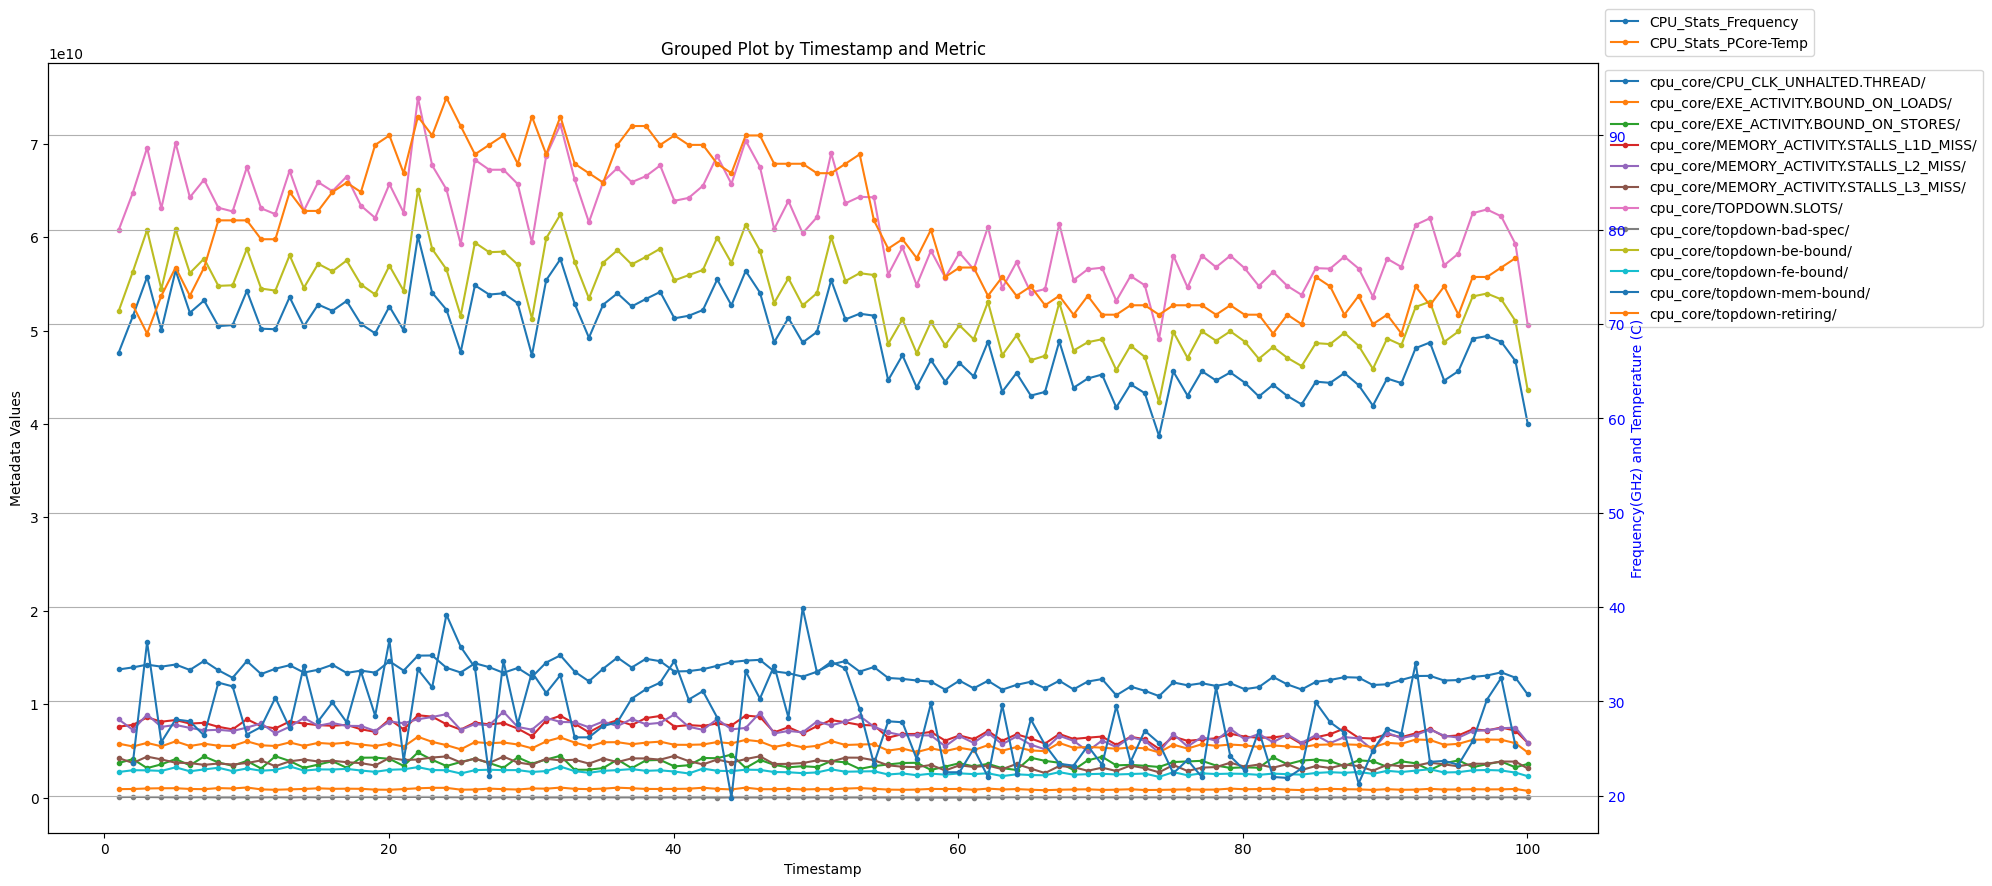

In [1071]:

## BLOCK 6 OF CODE _ Plots all the counters along with target temperature of P-CORES. 

# Reading and parsing the text file which has this command run 
#sudo /home/drdang/phD/thesis/linux-6.6.8/tools/perf/perf stat -I 1000 -M Frontend_Bound,Backend_Bound,Bad_Speculation,Retiring /usr/bin/stress-ng --matrix 35 --timeout 50s --thermalstat 1
#same code will work for summary also which is below => 
#sudo /home/drdang/phD/thesis/linux-6.6.8/tools/perf/perf stat -I 1000 -M Summary /usr/bin/stress-ng --matrix 35 --timeout 50s --thermalstat 1
#same code will work for summary also which is below => 
#sudo /home/drdang/phD/thesis/linux-6.6.8/tools/perf/perf stat -I 1000 -M TmaL2 /usr/bin/stress-ng --matrix 35 --timeout 50s --thermalstat 1

# Group data by 'timestamp' and 'metric' and aggregate 'metadata', 'PCore-Temp', and 'ECore-Temp'

grouped_data = df.groupby(['timestamp', 'metric']).agg({
    'metadata': 'mean',
    'PCore-Temp': 'mean',
    'ECore-Temp': 'mean'
}).reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Create secondary axis
ax2 = ax.twinx()  # Create a twin y-axis

# Plot grouped data
for metric in grouped_data['metric'].unique():
    subset = grouped_data[grouped_data['metric'] == metric]
    print(f"{metric}")
    if metric == "CPU_Stats_ECore-Temp" or metric =="CPU_Stats_Frequency"  or  metric =="CPU_Stats_PCore-Temp":
        print ("to be plotted separately")
        ax2.plot(subset['timestamp'], subset['metadata'], marker='.', label=f"{metric}")
    else:
        ax.plot(subset['timestamp'], subset['metadata'], marker='.', label=f"{metric}")

"""
    elif metric=="cpu_core/topdown-bad-spec/" or metric=="cpu_core/topdown-be-bound/" or metric=="cpu_core/topdown-fe-bound/" or \
    metric=="cpu_core/topdown-mem-bound/" or metric=="cpu_core/topdown-retiring/" or metric=="cpu_core/TOPDOWN.SLOTS/" or \
    metric == "cpu_core/INST_RETIRED.ANY/" or metric == "cpu_core/MEMORY_ACTIVITY.STALLS_L1D_MISS/" or \
    metric == "cpu_core/MEMORY_ACTIVITY.STALLS_L2_MISS/" or metric == "cpu_core/MEMORY_ACTIVITY.STALLS_L3_MISS/" or metric == "cpu_core/INT_MISC.UOP_DROPPING/" :
        ax.plot(subset['timestamp'], subset['metadata'], marker='.', label=f"{metric}")
"""

"""
    elif metric == "cpu_core/INST_RETIRED.ANY/" or metric == "cpu_core/MEMORY_ACTIVITY.STALLS_L1D_MISS/" or metric == "cpu_core/MEMORY_ACTIVITY.STALLS_L2_MISS/" or metric == "cpu_core/MEMORY_ACTIVITY.STALLS_L3_MISS/" or metric == "cpu_core/TOPDOWN.SLOTS/":
        ax.plot(subset['timestamp'], subset['metadata'], marker='.', label=f"{metric}")

  
    
    matching_rows = grouped_data[grouped_data['metric'] == "cpu_core/INT_MISC.UOP_DROPPING/"]
    badspec = matching_rows['metadata']
    #print(badspec)
    
    matching_rows = grouped_data[grouped_data['metric'] == "cpu_core/INST_RETIRED.ANY/"]
    totalretired = matching_rows['metadata']

# Element-wise division
result = [100*(badspec /totalretired)  for badspec, totalretired in zip(badspec, totalretired)]
print(result)
"""



# Add labels, legend, and title
ax.set_xlabel("Timestamp")
ax.set_ylabel("Metadata Values")
ax.set_title("Grouped Plot by Timestamp and Metric")
legend1 = ax.legend(loc='upper left',  bbox_to_anchor=(1, 1))  # Legend for primary axis
plt.grid(True)

#here are the secondary axis details.
ax2.set_ylabel('Frequency(GHz) and Temperature (C)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
legend1 = ax2.legend(loc='lower left',  bbox_to_anchor=(1, 1))  # Legend for primary axis

plt.show()

No duplicates found; safe to pivot.


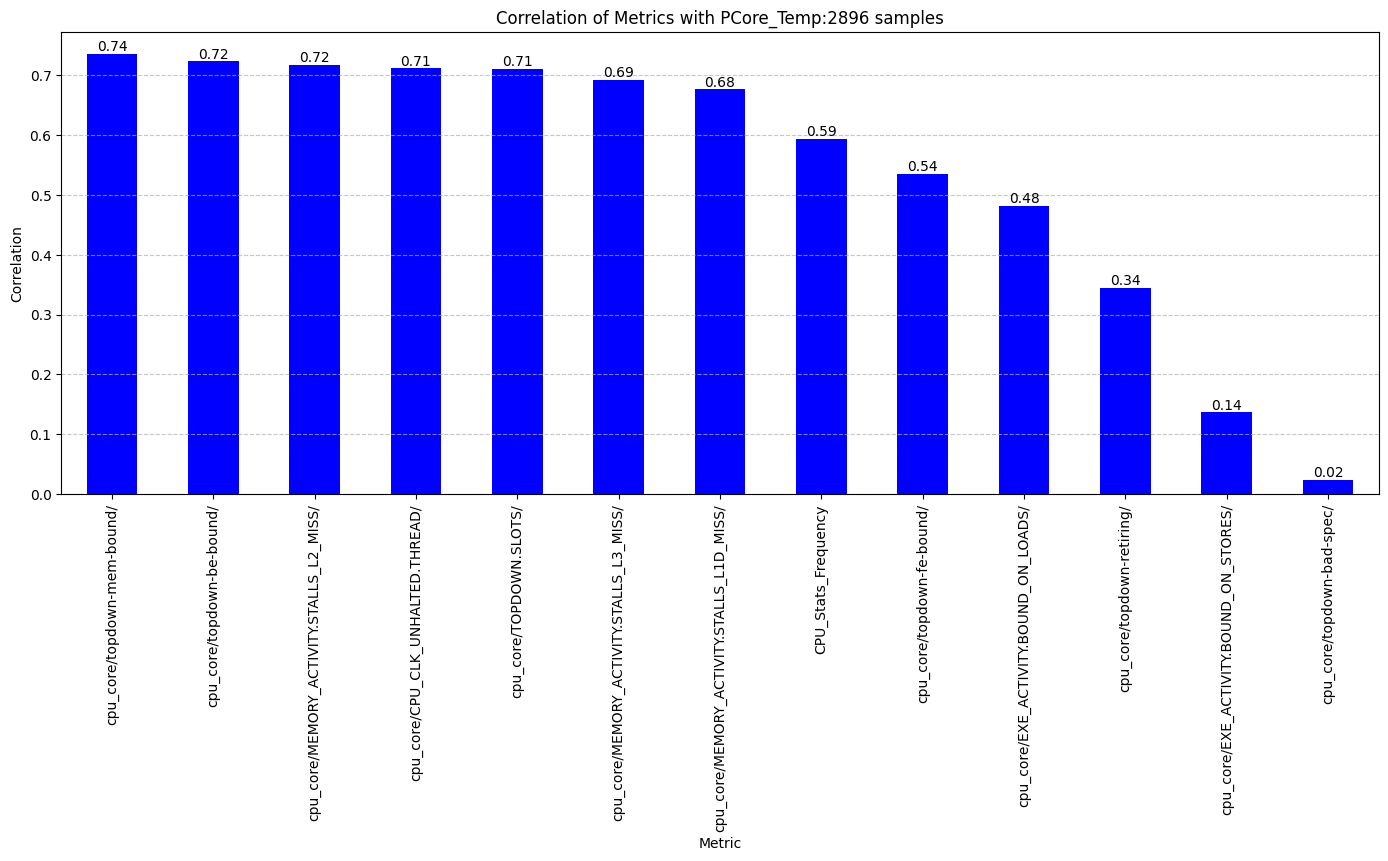

Correlations of each metric with PCore_Temp:2896 samples


metric
cpu_core/topdown-mem-bound/                  0.735480
cpu_core/topdown-be-bound/                   0.723190
cpu_core/MEMORY_ACTIVITY.STALLS_L2_MISS/     0.717640
cpu_core/CPU_CLK_UNHALTED.THREAD/            0.711515
cpu_core/TOPDOWN.SLOTS/                      0.710474
cpu_core/MEMORY_ACTIVITY.STALLS_L3_MISS/     0.691962
cpu_core/MEMORY_ACTIVITY.STALLS_L1D_MISS/    0.676367
CPU_Stats_Frequency                          0.593292
cpu_core/topdown-fe-bound/                   0.535123
cpu_core/EXE_ACTIVITY.BOUND_ON_LOADS/        0.481279
cpu_core/topdown-retiring/                   0.344840
cpu_core/EXE_ACTIVITY.BOUND_ON_STORES/       0.136715
cpu_core/topdown-bad-spec/                   0.023675
Name: CPU_Stats_PCore-Temp, dtype: float64

In [1072]:
## BLOCK 7 OF CODE - CORRELATION TO OTHER COUNTERS and CORRELATION TO THE TARGET TEMPERATURE.

# This box is for the correlatoin of the counters to the target p-core temperature 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[df['metric'] != 'NA'].copy()
# Step 1: Aggregate to ensure unique timestamp-metric combinations
aggregated_df = filtered_df.groupby(['timestamp', 'metric'], as_index=False).agg({
    'metadata': 'mean'  # Use 'mean' to resolve duplicates; replace with 'sum' or 'max' as needed
})

# Step 2: Verify no duplicates remain
if aggregated_df.duplicated(subset=['timestamp', 'metric']).any():
    print("Duplicates still exist after aggregation.")
else:
    print("No duplicates found; safe to pivot.")

# Step 3: Pivot the metrics to have one column per unique metric
#pivoted_df = aggregated_df.pivot(index='timestamp', columns='metric', values='metadata')

# Step 4: Add PCore_Temp back as a column to the pivoted DataFrame
#pivoted_df = pd.merge(pivoted_df, target_df, on='timestamp', how='inner')

# Assuming `aggregated_df` is the DataFrame
pivoted_df = aggregated_df.pivot(index='timestamp', columns='metric', values='metadata')

# Reset the index for a cleaner DataFrame
pivoted_df = pivoted_df.reset_index()

#pivoted_df = pivoted_df.fillna(0) 

# Step 5: Compute the correlation matrix
#correlation_matrix = pivoted_df.drop(columns=['timestamp', 'TSC', 'ns']).corr()
correlation_matrix = pivoted_df.drop(columns=['timestamp']).corr()


# Extract correlations with PCore_Temp
correlation_with_target = correlation_matrix['CPU_Stats_PCore-Temp'].drop('CPU_Stats_PCore-Temp')

colors = ['green' if value >= 0.75 else 'blue' for value in correlation_with_target.sort_values(ascending=False)]

# Step 6: Plot the correlations
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 6))
bars = correlation_with_target.sort_values(ascending=False).plot(kind='bar', color=colors, title=f"Correlation of Metrics with PCore_Temp:{numSamples} samples")

# Annotate the bars with their values
for bar in bars.patches:
    plt.annotate(
        format(bar.get_height(), '.2f'),  # Format the value
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position at the top of the bar
        ha='center', va='bottom',  # Center alignment
        fontsize=10, color='black'  # Font styling
    )

plt.xlabel('Metric')
plt.ylabel('Correlation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print correlations for reference
print(f"Correlations of each metric with PCore_Temp:{numSamples} samples")
correlation_with_target = correlation_with_target.sort_values(ascending=False)
correlation_with_target

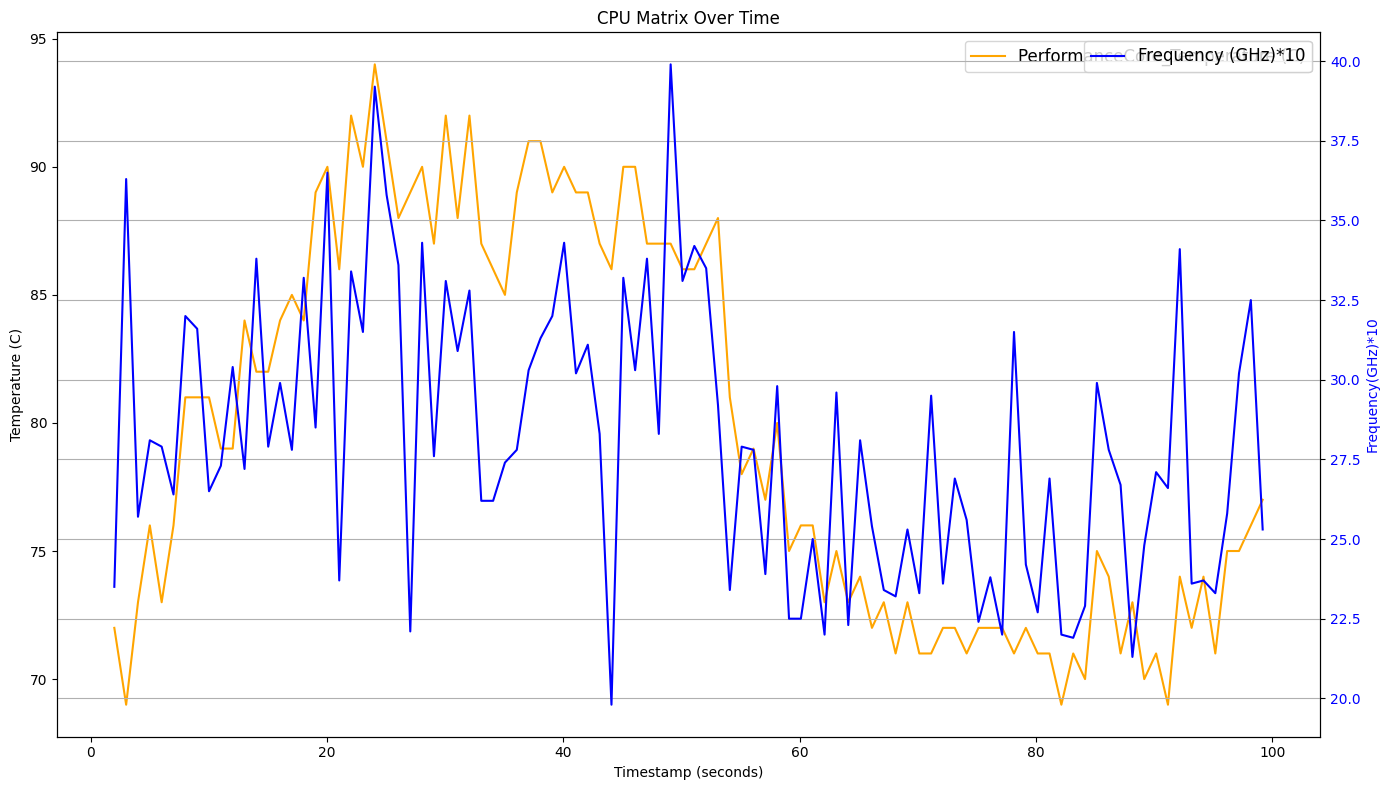

In [1073]:
## BLOCK 5 OF CODE _ reads the following real target data !!
#data read from the real hardware - frequency, pcore temperature and ecore temperature

import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(14, 8))

# Sort frequency values (optional, as Matplotlib does this by default)
#sorted_frequency = np.sort(df['frequency'])

def getCPUStatBuffer(parameter):
    prev = float(pivoted_df[parameter][0])
    index = 0
    cpuStats_array = [] 
    for idx in range (0, len(pivoted_df[parameter])):
        value = pivoted_df[parameter][idx]
        if value == 0:
            cpuStats_array.append(float(prev))
        else:
            prev = value
            cpuStats_array.append(float(value))
        index = index + 1
    
    
    # Calculate min, max, and average
    min_val = min(cpuStats_array)
    max_val = max(cpuStats_array)
    avg_val = sum(cpuStats_array) / len(cpuStats_array)
    
    # Find indices of min and max for labeling
    max_idx = cpuStats_array.index(max_val)
    min_idx = cpuStats_array.index(min_val)

    
    # Plot the data
    #plt.plot(cpuStats_array, marker='o', label='frequency_range')
    
    # Add labels for min, max, and average
    #plt.text(pivoted_df['timestamp'][min_idx], min_val, f"Min: {min_val}", color='blue')
    #plt.text(pivoted_df['timestamp'][max_idx], max_val, f"Max: {max_val}",  color='red')

    return cpuStats_array

# Add average as a horizontal line
#plt.axhline(avg_val, color='green', linestyle='--', label=f"Average: {avg_val:.2f}")
#plt.text(len(pivoted_df['timestamp'])- 1, avg_val, f"Avg: {avg_val:.2f}", va='bottom', color='green')



cpuStatData1 = getCPUStatBuffer("CPU_Stats_PCore-Temp")
# Plot sorted frequency over timestamp
ax1.plot(pivoted_df['timestamp'], cpuStatData1, label='PerformanceCore_Temperature (C)', color='orange')
#print (pivoted_df['CPU_Stats_PCore-Temp'])

if 'CPU_Stats_ECore-Temp' in pivoted_df:
    cpuStatData2 = getCPUStatBuffer("CPU_Stats_ECore-Temp")
    # Plot sorted frequency over timestamp
    ax1.plot(pivoted_df['timestamp'], cpuStatData2, label='EfficientCore_Temperature (C)', color='green')


if 'energy-pkg/' in pivoted_df:
    cpuStatData3 = getCPUStatBuffer("energy-pkg/") 
    cpuStatData3 = [a/1e9 for a in cpuStatData3] 
    # Plot sorted frequency over timestamp
    ax1.plot(pivoted_df['timestamp'], cpuStatData3, label='energy-pkg(J)', color='red')

if 'task-clock' in pivoted_df:
    cpuStatData5 = getCPUStatBuffer("task-clock") 
    cpuStatData5 = [a/1000 for a in cpuStatData5] 
    # Plot sorted frequency over timestamp
    ax1.plot(pivoted_df['timestamp'], cpuStatData5, label='Num Active CPUs * 10', color='purple')




# Ensure y-axis is sorted from lower to higher
#ax1.set_ylim(bottom=sorted_frequency.min(), top=sorted_frequency.max())

# Create secondary axis
cpuStatData4 = getCPUStatBuffer("CPU_Stats_Frequency")
ax2 = ax1.twinx()  # Create a twin y-axis
ax2.plot(pivoted_df['timestamp'], cpuStatData4, label='Frequency (GHz)*10', color='blue')
ax2.set_ylabel('Frequency(GHz)*10', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_ylabel("Temperature (C)")
ax1.set_xlabel("Timestamp (seconds)")
plt.title("CPU Matrix Over Time")
samples = len(cpuStatData)
samples = "CPU Metrics: " + str(samples) + " Samples"
#plt.legend(title=samples, fontsize=12)

ax1.legend(loc='best', fontsize=12)  # Place legend in the best location automatically
ax2.legend(loc='best', fontsize=12)  # Place legend in the best location automatically

plt.grid(True)
fig.tight_layout()  # Ensure labels don't overlap
plt.show()


['drdang@drdang-Inspiron-14-7430-2-in-1:~/phD/thesis/tools/perf$ sudo /home/drdang/phD/thesis/linux-6.6.8/tools/perf/perf stat -I 1000 -M TmaL3Mem /usr/bin/stress-ng --llc-affinity 8 --timeout 100s --thermalstat 1']
=================LINEAR REGRESSION ========================
Linear Reg: Mean Absolute Error (MAE): 5.69
Linear Reg: Root Mean Squared Error (RMSE): 9.58
Linear Reg: R-squared (Accuracy): 0.66
=================LOGISTIC REGRESSION ========================
Logistic Classification Accuracy: 0.90
Logistic Mean Absolute Error (MAE): 5.69
Logistic Root Mean Squared Error (RMSE): 9.58
================= XGBOOST ===============================
XGBoost: Mean Absolute Error (MAE): 3.29
XGBoost: Root Mean Squared Error (RMSE): 4.65
XGBoost: R-squared (Accuracy): 0.92


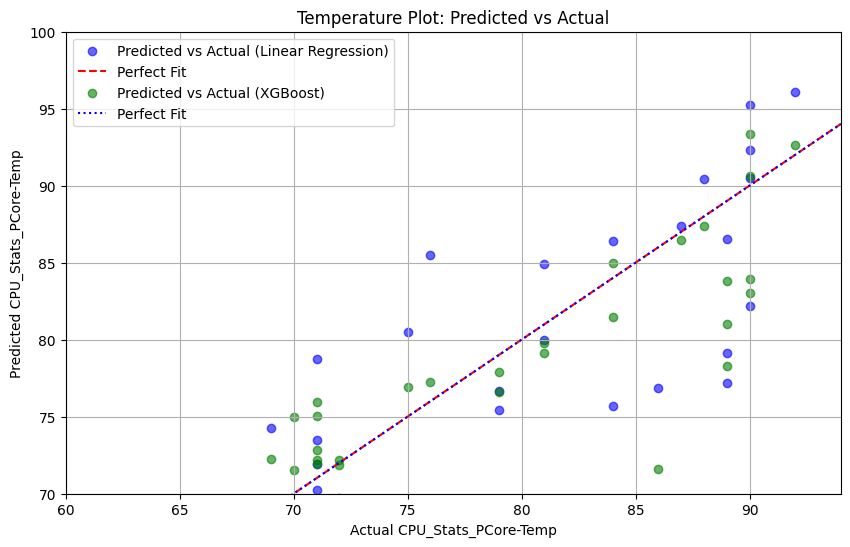

                                      Feature  Importance
0                         CPU_Stats_Frequency    0.398497
1           cpu_core/CPU_CLK_UNHALTED.THREAD/    0.163802
6    cpu_core/MEMORY_ACTIVITY.STALLS_L3_MISS/    0.155541
7                     cpu_core/TOPDOWN.SLOTS/    0.077737
8                  cpu_core/topdown-bad-spec/    0.038725
5    cpu_core/MEMORY_ACTIVITY.STALLS_L2_MISS/    0.035954
2       cpu_core/EXE_ACTIVITY.BOUND_ON_LOADS/    0.033534
10                 cpu_core/topdown-fe-bound/    0.028312
12                 cpu_core/topdown-retiring/    0.020977
3      cpu_core/EXE_ACTIVITY.BOUND_ON_STORES/    0.016716
9                  cpu_core/topdown-be-bound/    0.014342
4   cpu_core/MEMORY_ACTIVITY.STALLS_L1D_MISS/    0.012695
11                cpu_core/topdown-mem-bound/    0.003168


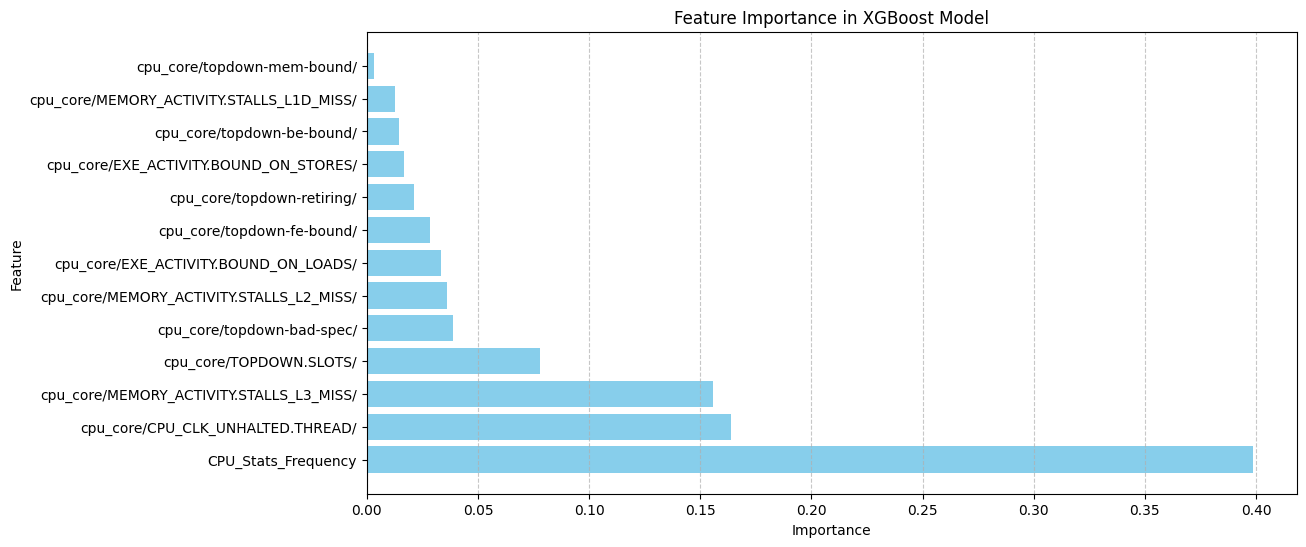

/tmp/ipykernel_42925/205466313.py:196: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Correlation', y='Metric', palette='Blues_r')
/tmp/ipykernel_42925/205466313.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_scaled, x='ScaledCoefficient', y='Feature', palette='Blues_r')


                                      Feature   Coefficient
0                         CPU_Stats_Frequency  1.181605e+00
2       cpu_core/EXE_ACTIVITY.BOUND_ON_LOADS/  4.264321e-08
11                cpu_core/topdown-mem-bound/  8.137819e-09
1           cpu_core/CPU_CLK_UNHALTED.THREAD/  6.633297e-09
6    cpu_core/MEMORY_ACTIVITY.STALLS_L3_MISS/  5.730624e-09
7                     cpu_core/TOPDOWN.SLOTS/  3.746888e-09
12                 cpu_core/topdown-retiring/  1.616683e-09
3      cpu_core/EXE_ACTIVITY.BOUND_ON_STORES/ -2.278681e-09
5    cpu_core/MEMORY_ACTIVITY.STALLS_L2_MISS/ -2.452762e-09
9                  cpu_core/topdown-be-bound/ -1.036261e-08
10                 cpu_core/topdown-fe-bound/ -1.092900e-08
4   cpu_core/MEMORY_ACTIVITY.STALLS_L1D_MISS/ -1.147844e-08
8                  cpu_core/topdown-bad-spec/ -2.782614e-08


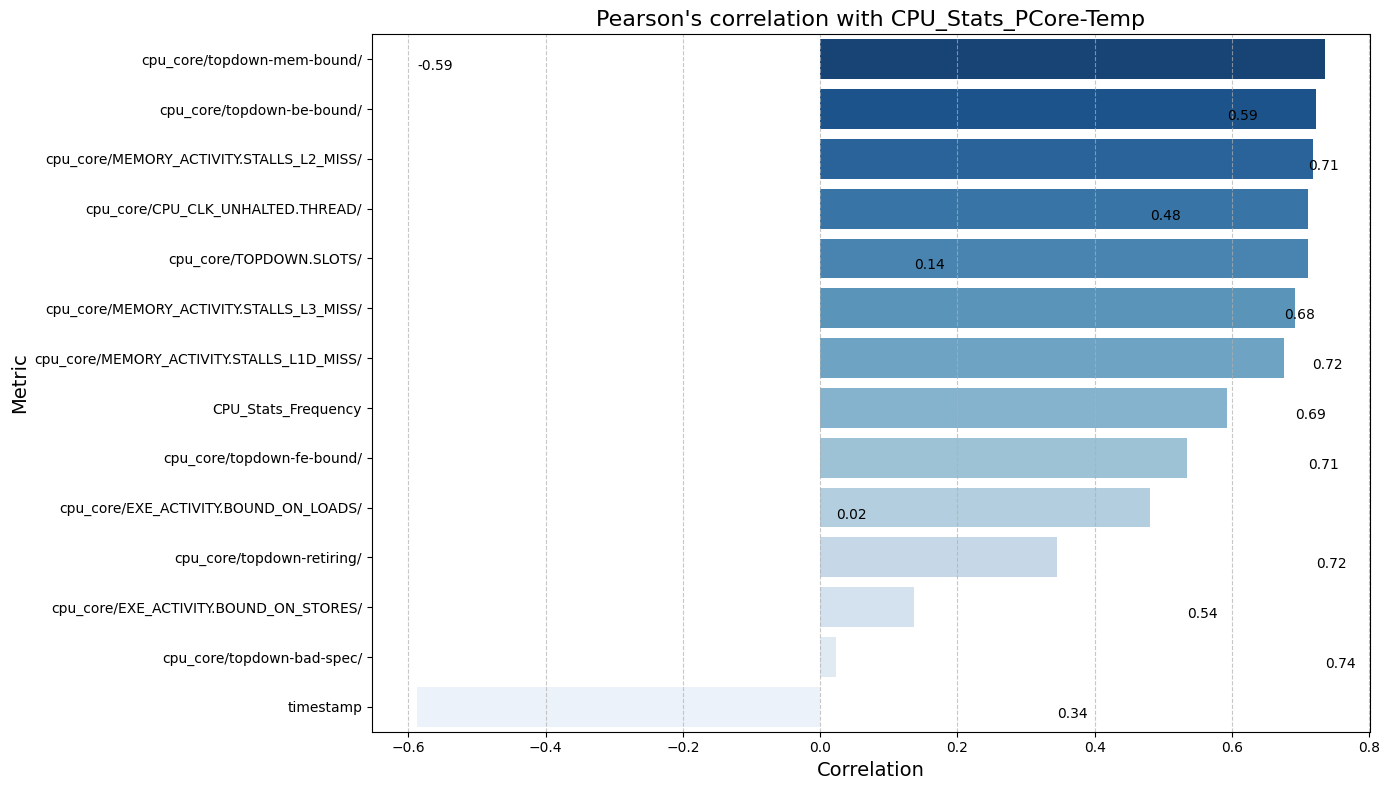

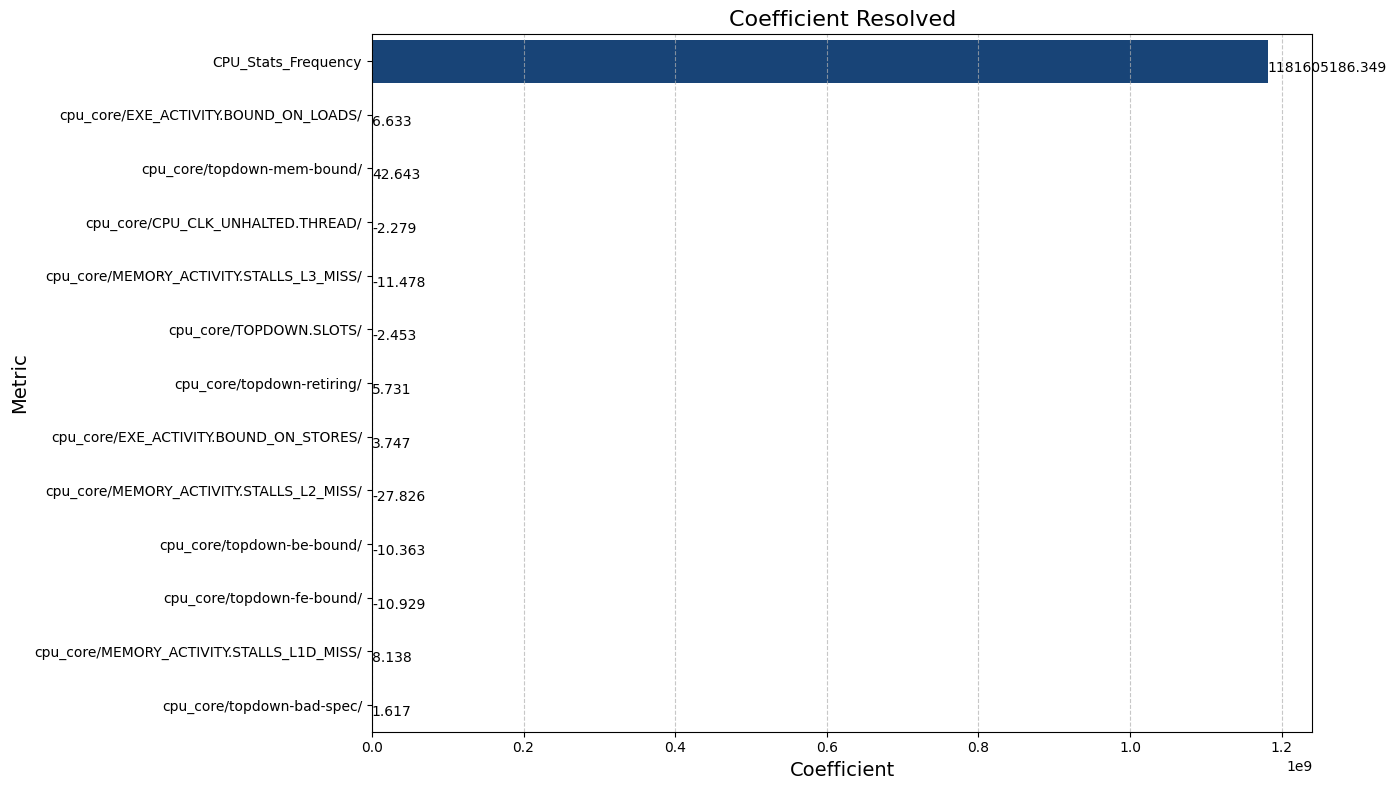

In [1074]:
## BLOCK 9 OF CODE - PLOT THE ACTUAL VS PREDICTED VALUE OF TEMPERATURE !!!! 


# Linear regression plots preparation to be done after the counter collections either in L3/L1/L1/Summary stuff or otherwise.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv("your_sample_data.csv")  # Replace with actual DataFrame loading

filtered_df = df[df['metric'] != 'NA'].copy()
# Step 1: Aggregate to ensure unique timestamp-metric combinations
aggregated_df = filtered_df.groupby(['timestamp', 'metric'], as_index=False).agg({
    'metadata': 'mean'  # Use 'mean' to resolve duplicates; replace with 'sum' or 'max' as needed
})

# Step 2: Verify no duplicates remain
if aggregated_df.duplicated(subset=['timestamp', 'metric']).any():
    print("Duplicates still exist after aggregation.")


# Step 1: Data Preparation
# Extract target and features
target_metric = 'CPU_Stats_PCore-Temp'
features = ['metadata']  # List of all other metrics
#df_filtered = df[df['metric'] != target_metric]


# Pivot the data to have one row per timestamp and one column per metric
df_pivoted = aggregated_df.pivot(index='timestamp', columns='metric', values='metadata').reset_index()

# Extract X (features) and y (target)
X = df_pivoted.drop(columns=['timestamp', target_metric])
y = df_pivoted[target_metric]
y = y.fillna(0) 



# Fill missing values if any
X = X.fillna(0)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


# Calculate errors
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Root Mean Squared Error
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)  # R-squared (Accuracy for regression)


print(commandUsed)

print ("=================LINEAR REGRESSION ========================")
# Print the errors
print(f"Linear Reg: Mean Absolute Error (MAE): {mae:.2f}")
print(f"Linear Reg: Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Linear Reg: R-squared (Accuracy): {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual (Linear Regression)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title(f'Linear Regression: Predicted vs Actual :{numSamples} samples')
plt.xlabel('Actual CPU_Stats_PCore-Temp')
plt.ylabel('Predicted CPU_Stats_PCore-Temp')
plt.legend()
plt.grid(True)
plt.xlim(60, 94)
plt.ylim(70, 100)
#plt.show()

#evaluate the coefficients 
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})

#Push the coefficents into the file :
import os

output_directory = r"C:\Users\balvi\Downloads\perftestcoverage\report"
os.makedirs(output_directory, exist_ok=True)  # Create if it doesn't exist
filen = "Coefficients_LinearReg_" + f"{workload}" + ".xlsx"
output_file = os.path.join(output_directory, filen)

# Write to an Excel file
coefficients.to_excel(output_file, index=False)


""" LOGISTIC REGRESSION STARTS HERE """
# Step 4: Classification (High vs Low Temperature)
# Binarize the target (e.g., High Temp > 50)
y_binary = (y > 50).astype(int)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bin, y_train_bin)
y_pred_bin = log_reg.predict(X_test_bin)

# Evaluate Classification
accuracy = accuracy_score(y_test_bin, y_pred_bin)

print ("=================LOGISTIC REGRESSION ========================")
print(f"Logistic Classification Accuracy: {accuracy:.2f}")

# Step 5: Errors (Regression)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Logistic Mean Absolute Error (MAE): {mae:.2f}")
print(f"Logistic Root Mean Squared Error (RMSE): {rmse:.2f}")
""" LOGISTIC REGRESSION ENDS HERE """

""" XGBOOST HERE """

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: XGBoost Regression
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

# Calculate errors for XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the errors
print ("================= XGBOOST ===============================")
print(f"XGBoost: Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"XGBoost: Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"XGBoost: R-squared (Accuracy): {r2_xgb:.2f}")
print ("=========================================================")


# Plot Actual vs Predicted for XGBoost
#plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.6, label='Predicted vs Actual (XGBoost)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='b', linestyle=':', label='Perfect Fit')
plt.title('Temperature Plot: Predicted vs Actual')
plt.xlabel('Actual CPU_Stats_PCore-Temp')
plt.ylabel('Predicted CPU_Stats_PCore-Temp')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate feature importance
importance = xgboost_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print (feature_importance_df)
# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


""" XGBOOST END """

""" PEARSON'S COEFFICIENT START """

# Compute correlation matrix
correlation_matrix = df_pivoted.corr()

# Extract correlations with the target metric
correlation_with_target = correlation_matrix['CPU_Stats_PCore-Temp'].drop('CPU_Stats_PCore-Temp')

# Convert to DataFrame for easy plotting
correlation_df = correlation_with_target.reset_index()
correlation_df.columns = ['Metric', 'Correlation']

# Sort by absolute correlation for better visualization
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Create a seaborn barplot
plt.figure(figsize=(14, 8))
sns.barplot(data=correlation_df, x='Correlation', y='Metric', palette='Blues_r')

# Annotate bar values
for index, row in correlation_df.iterrows():
    plt.text(row['Correlation'], index, f"{row['Correlation']:.2f}", color='black', va='top')

# Add title and labels
plt.title("Pearson's correlation with CPU_Stats_PCore-Temp", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("Metric", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

print ("\n\n")

""" PEARSON'S COEFFICIENT END """

"""Plot Starts - Coeffients here """ 

# Convert to DataFrame for easy plotting
coef_df = coefficients.reset_index()
coef_df.columns = ['Index', 'Feature', 'Coefficient']

df_scaled = coef_df
# Scale smaller coefficients for visibility

df_scaled["ScaledCoefficient"] = coef_df["Coefficient"] * 1e9

# Sort by absolute correlation for better visualization
df_scaled = df_scaled.sort_values(by='ScaledCoefficient', ascending=False)

# Create a seaborn barplot
plt.figure(figsize=(14, 8))
sns.barplot(data=df_scaled, x='ScaledCoefficient', y='Feature', palette='Blues_r')


# Annotate bar values
for index, row in df_scaled.iterrows():
    plt.text(row['ScaledCoefficient'], index, f"{row['ScaledCoefficient']:.3f}", color='black', va='top')

# Add title and labels
plt.title("Coefficient Resolved", fontsize=16)
plt.xlabel("Coefficient", fontsize=14)
plt.ylabel("Metric", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

#Now print the Linear Regression's coefficients , which was calculated earlier.
print(coefficients.sort_values(by='Coefficient', ascending=False))

#end of coefficient plotting.



/tmp/ipykernel_42925/1333818202.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  colored_matrix = correlation_matrix.applymap(color_map)


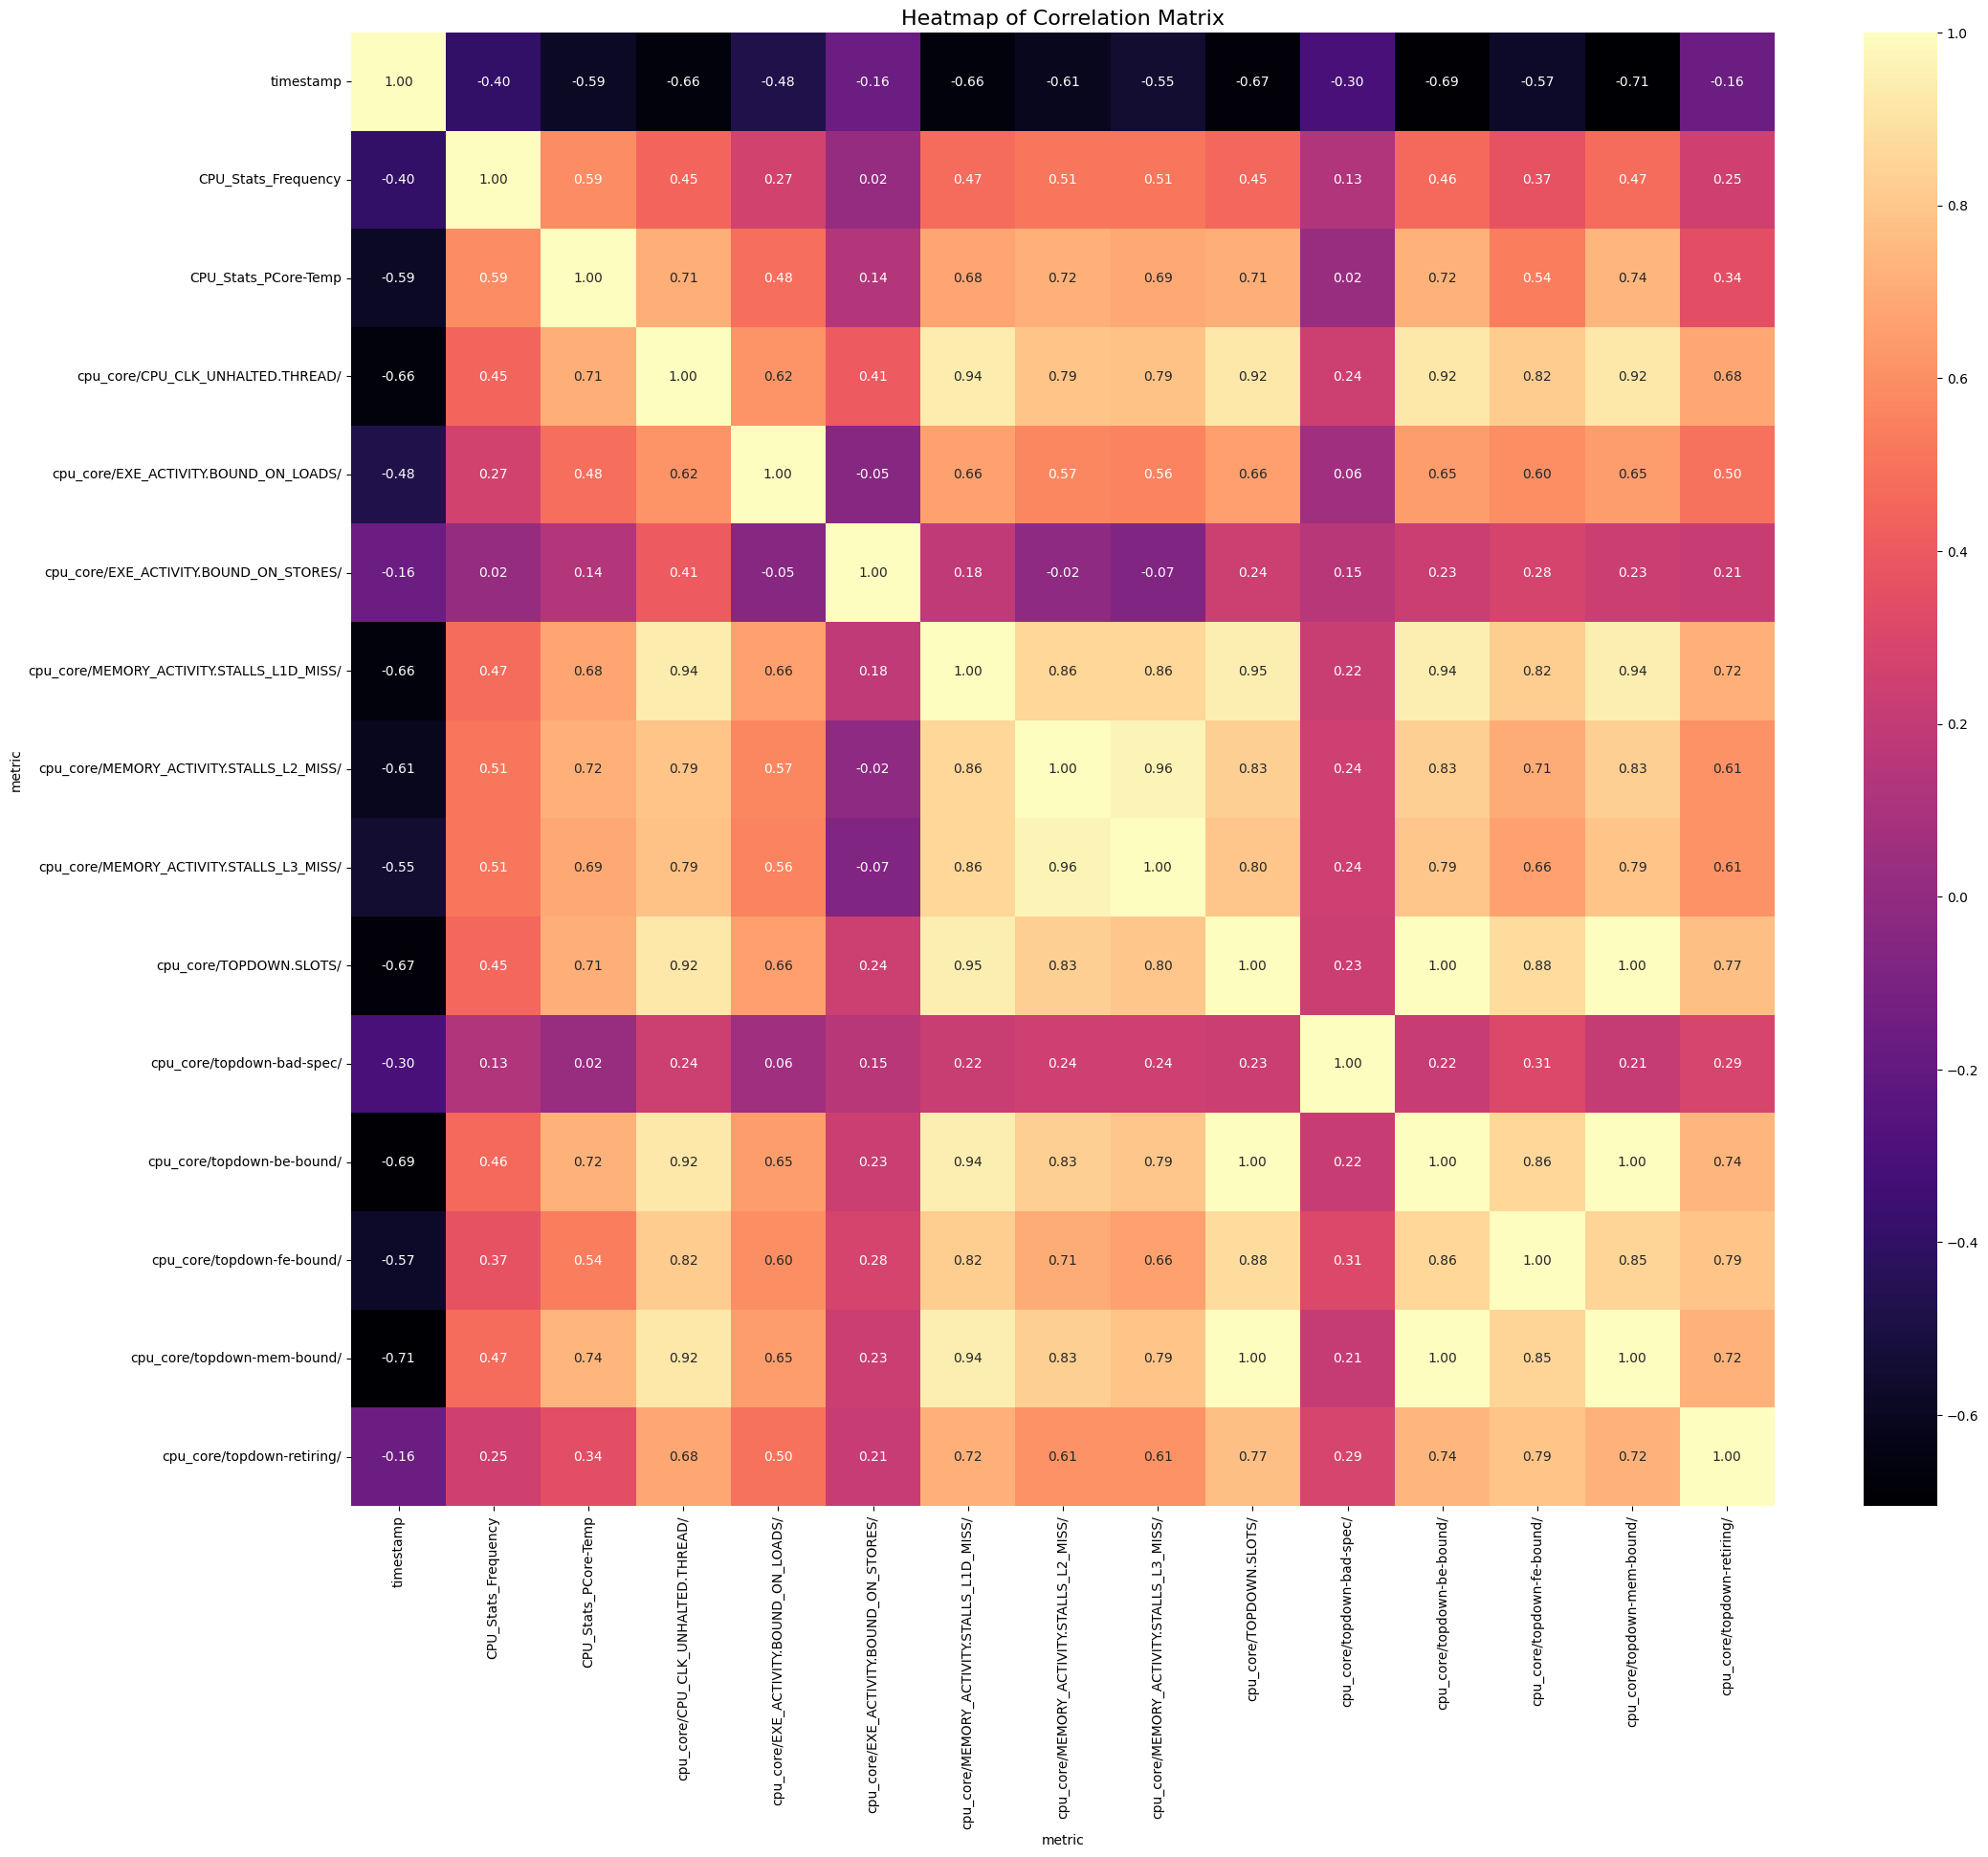

In [1075]:
## BLOCK 8 OF CODE - CORRELATION TO OTHER COUNTERS


# Parse the correlation data

#correlation_matrix = pd.read_csv(io.StringIO(data), sep="\t", index_col=0)



# Custom colormap logic for values

def color_map(val):
    if val < 0.75:
        return 'white'
    elif 0.75 <= val <= 0.8:
        return 'lightgreen'
    else:
        return 'darkgreen'


# Apply custom colormap to dataframe for highlighting
colored_matrix = correlation_matrix.applymap(color_map)

# Plot the heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="magma", cbar=True)
plt.title("Heatmap of Correlation Matrix", fontsize=16)

plt.show()

In [1076]:
columns = correlation_matrix.columns
data = { } 

data['metrics'] = columns

for x in columns:
    #print(correlation_matrix[x].tolist())
    data[x] = correlation_matrix[x].tolist()

#print(data)

df1 = pd.DataFrame(data)
df1.set_index('metrics', inplace=True)

# Add a column with the sum of each row
df1['Total'] = df1.sum(axis=1) - 1

sum_row = pd.DataFrame(df1.iloc[:, 1:].sum()).T  # Sum for numeric columns
df1 = pd.concat([df1, sum_row], ignore_index=False)
# Add a column with the sum of each row

df1['Weight'] = (df1['Total'] / df1['Total'].iloc[-1]) * 100

df1["Weight"] = df1["Weight"].round(2)

# Sort by the Total column in descending order
df_sorted = df1.sort_values(by='Total', ascending=False)

# Function to highlight the Total column
def highlight_column(column):
    return ["background-color: lightblue;" if col == column[-1] else "" for col in column]

# Apply the highlight function
styled_df = df_sorted.style.apply(highlight_column, subset=["Weight"], axis=1)

# Select the 'metric' index and 'Weight' column
new_df = df_sorted.reset_index()[['index', 'Weight']]

# Rename the columns for clarity
new_df.rename(columns={'index': 'Metric'}, inplace=True)

#print( f"{file_path.split('/')[-1].split(':')[0]}:\n{new_df}")

filename = file_path.split('/')[-1].split(':')[0]


# Write to an Excel file
output_file = "Ranking_Counters_" + filename + ".xlsx"
new_df.to_excel(output_file, index=False)

styled_df


/tmp/ipykernel_42925/1135019145.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return ["background-color: lightblue;" if col == column[-1] else "" for col in column]


,timestamp,CPU_Stats_Frequency,CPU_Stats_PCore-Temp,cpu_core/CPU_CLK_UNHALTED.THREAD/,cpu_core/EXE_ACTIVITY.BOUND_ON_LOADS/,cpu_core/EXE_ACTIVITY.BOUND_ON_STORES/,cpu_core/MEMORY_ACTIVITY.STALLS_L1D_MISS/,cpu_core/MEMORY_ACTIVITY.STALLS_L2_MISS/,cpu_core/MEMORY_ACTIVITY.STALLS_L3_MISS/,cpu_core/TOPDOWN.SLOTS/,cpu_core/topdown-bad-spec/,cpu_core/topdown-be-bound/,cpu_core/topdown-fe-bound/,cpu_core/topdown-mem-bound/,cpu_core/topdown-retiring/,Total,Weight
0,nan,5.552126,7.494484,9.524124,6.743366,2.790530,9.576095,8.816368,8.648280,9.748637,3.257919,9.667370,8.893341,9.639147,8.073623,87.210613,100.000000
cpu_core/TOPDOWN.SLOTS/,-0.672962,0.454721,0.710474,0.917149,0.655333,0.236119,0.945851,0.830421,0.797454,1.000000,0.233299,0.998328,0.875361,0.996517,0.770572,8.748637,10.030000
cpu_core/topdown-be-bound/,-0.694512,0.462472,0.723190,0.915812,0.653408,0.230571,0.944609,0.828241,0.793797,0.998328,0.216673,1.000000,0.856816,0.999322,0.738643,8.667370,9.940000
cpu_core/topdown-mem-bound/,-0.705200,0.469055,0.735480,0.915750,0.648655,0.233401,0.942120,0.828630,0.791759,0.996517,0.209148,0.999322,0.852369,1.000000,0.722141,8.639147,9.910000
cpu_core/MEMORY_ACTIVITY.STALLS_L1D_MISS/,-0.661941,0.468683,0.676367,0.939350,0.662155,0.181833,1.000000,0.855140,0.859980,0.945851,0.222362,0.944609,0.820818,0.942120,0.718769,8.576095,9.830000
cpu_core/CPU_CLK_UNHALTED.THREAD/,-0.660322,0.450767,0.711515,1.000000,0.615959,0.406211,0.939350,0.788207,0.785705,0.917149,0.236184,0.915812,0.818739,0.915750,0.683099,8.524124,9.770000
cpu_core/topdown-fe-bound/,-0.573732,0.365437,0.535123,0.818739,0.595739,0.279593,0.820818,0.705059,0.662196,0.875361,0.310848,0.856816,1.000000,0.852369,0.788975,7.893341,9.050000
cpu_core/MEMORY_ACTIVITY.STALLS_L2_MISS/,-0.611869,0.511807,0.717640,0.788207,0.567647,-0.018363,0.855140,1.000000,0.963265,0.830421,0.242430,0.828241,0.705059,0.828630,0.608112,7.816368,8.960000
cpu_core/MEMORY_ACTIVITY.STALLS_L3_MISS/,-0.548302,0.510461,0.691962,0.785705,0.560008,-0.073375,0.859980,0.963265,1.000000,0.797454,0.244048,0.793797,0.662196,0.791759,0.609321,7.648280,8.770000
cpu_core/topdown-retiring/,-0.161155,0.250520,0.344840,0.683099,0.499844,0.214282,0.718769,0.608112,0.609321,0.770572,0.285661,0.738643,0.788975,0.722141,1.000000,7.073623,8.110000


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:53: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:53: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_42925/132319481.py:9: SyntaxWarning: invalid escape sequence '\p'
  file_path = '.\perftestcoverage\rankingbyweights.txt'  # Replace with the correct file path
/tmp/ipykernel_42925/132319481.py:53: SyntaxWarning: invalid escape sequence '\p'
  plt.savefig('.\perftestcoverage\metrics_mean_vertical.png')


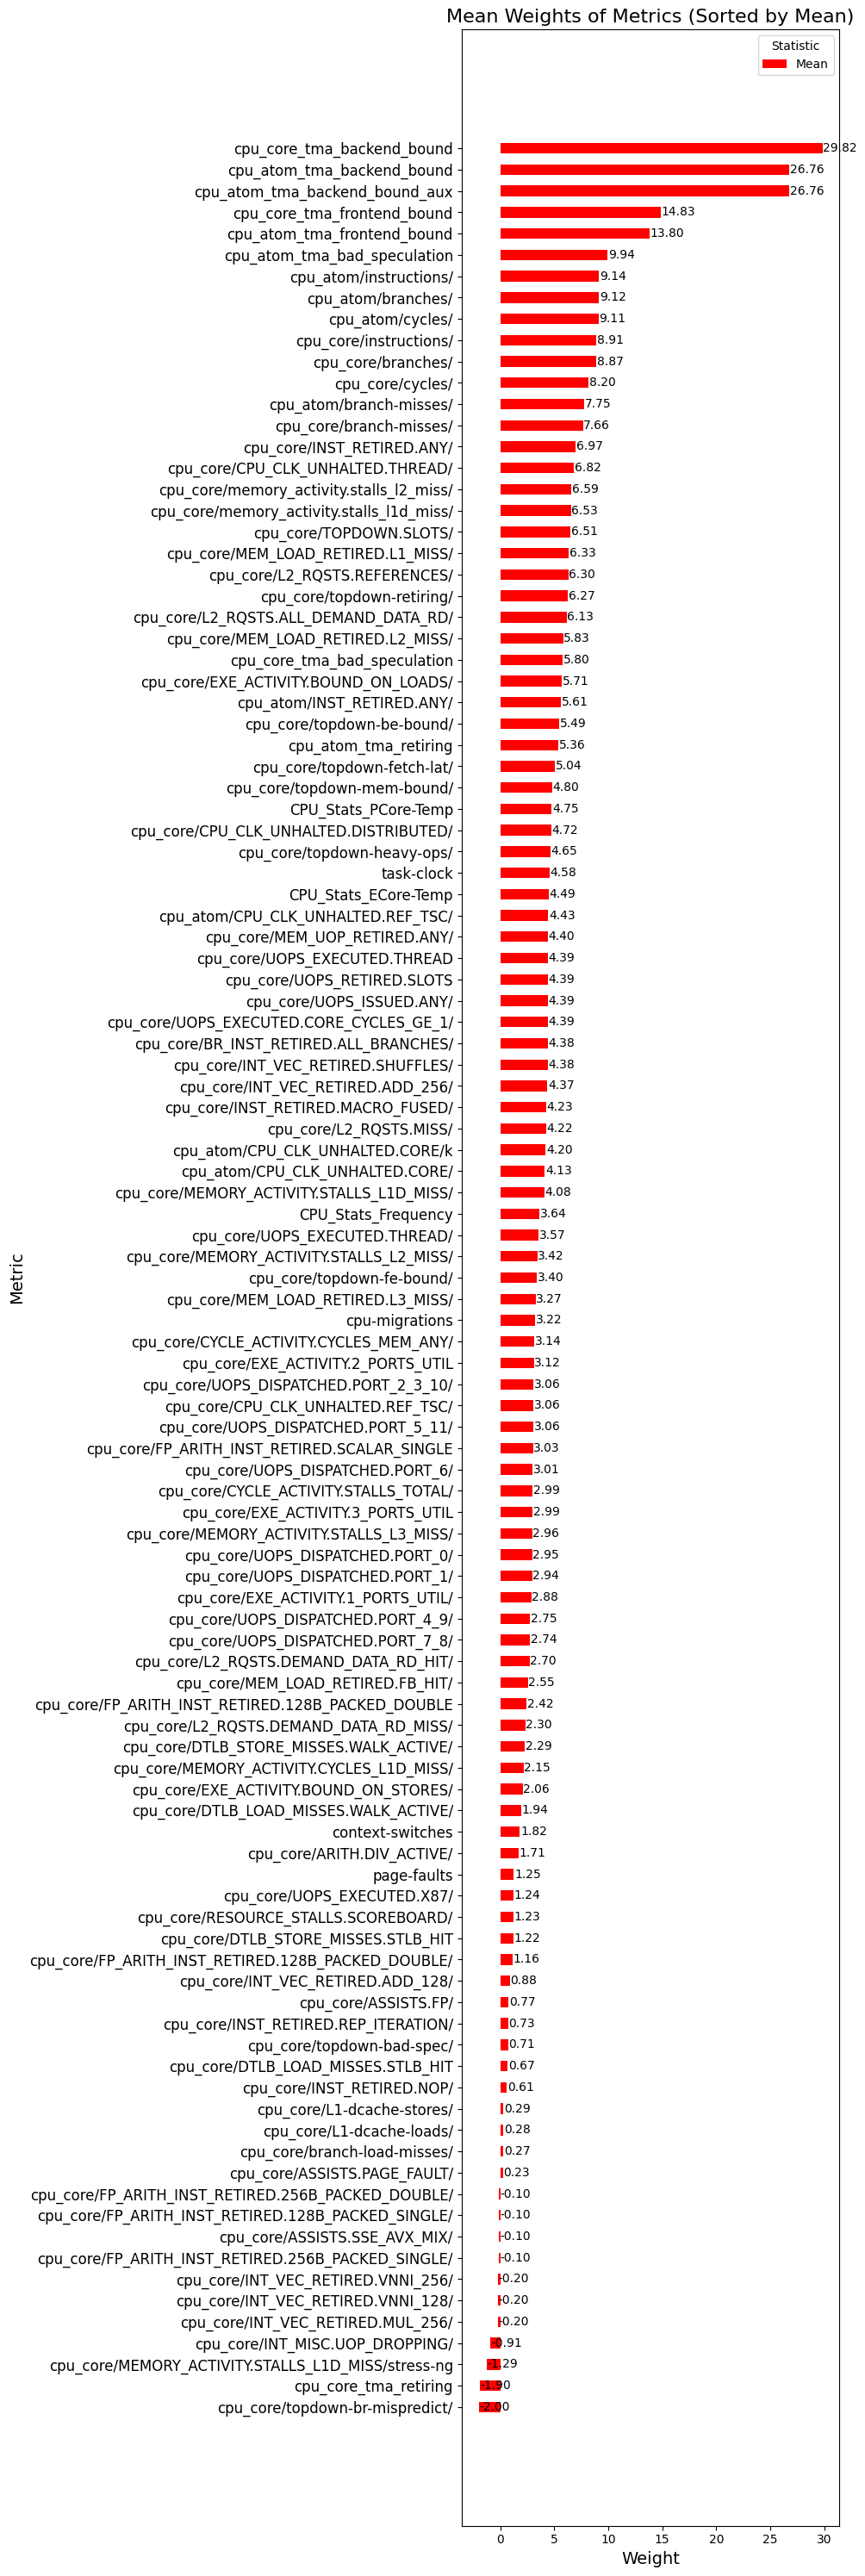

In [1077]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
if linux: 
    file_path = '/home/drdang/phD/thesis/tools/perf/rankingbyweights.txt'  # Replace with the correct file path
else:
    file_path = '.\perftestcoverage\rankingbyweights.txt'  # Replace with the correct file path

data = pd.read_csv(file_path, sep="\t")

# Aggregate metrics: calculate mean
agg_data = data.groupby("Metric")["Weight"].agg(["mean"]).reset_index()

# Sort data by mean in descending order
agg_data_sorted = agg_data.sort_values(by="mean", ascending=False)

# Plotting the bars vertically
length = len(agg_data_sorted)
x = np.arange(length)  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 30))

# Plot the mean bar
bars = ax.barh(x, agg_data_sorted["mean"], height=width, label="Mean", color="red")

# Add value labels on top of the bars
for bar in bars:
    ax.text(
        bar.get_width() + 0.05,  # Slightly offset to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered on the bar's y position
        f"{bar.get_width():.2f}",  # Format the value
        va="center",  # Vertical alignment
        fontsize=10
    )

# Customizations
ax.set_xlabel("Weight", fontsize=14)
ax.set_ylabel("Metric", fontsize=14)
ax.set_title("Mean Weights of Metrics (Sorted by Mean)", fontsize=16)
ax.set_yticks(x)
ax.set_yticklabels(agg_data_sorted["Metric"], ha="right", fontsize=12)
ax.invert_yaxis()  # Invert y-axis to show the largest at the top
ax.legend(title="Statistic", loc="upper right")
plt.tight_layout()

# Save the plot
if linux: 
    plt.savefig('/home/drdang/phD/thesis/tools/perf/metrics_mean_vertical.png')
else:
    plt.savefig('.\perftestcoverage\metrics_mean_vertical.png')

plt.show()


In [1078]:
#this code decorates data for the non-TMA based counters. 

import re

# Columns for structured data

columns = ['timestamp', 'value', 'metric', 'metadata','frequency', 'PCore-Temp', 'ECore-Temp']

#create a filter on the % items 
filteredInMetricPercentage = ['cpu_atom/branch-misses/' , 'cpu_core/branch-misses/']
filteredInMetricGHz = ['cpu_core/cycles/', 'cpu_atom/cycles/']
filteredInMetricPerSec = [ 'cpu-migrations', 'page-faults']

parsed_data = []

for line in readjustedList:

    valueMultiplier = 0
    # Check if any value in the list is in the string
    is_match_percenttype = any(value in line for value in filteredInMetricPercentage)
    is_match_GHz = any(value in line for value in filteredInMetricGHz)
    is_match_per_second = any(value in line for value in filteredInMetricPerSec)
    match_cpustats = re.match(r'(\d+\.\d+)\s+stress-ng.*therm:\s+(\d+\.\d+)', line)

    if is_match_percenttype == True:
        valueMultiplier = 100
    if is_match_GHz == True:
        valueMultiplier = 10 #MHz conversion
    if is_match_per_second == True or match_cpustats:
        valueMultiplier = 1

    if valueMultiplier == 0:
        continue

    # Regex to extract timestamp, value, metric, and metadata
    match = re.match(r'(\d+\.\d+)\s+([\d,]+)\s+([\w./-]+)\s+#\s+([\w./-]+)', line)
    match2 = re.match(r'(\d+\.\d+)\s+([\d,\d+.\d+]+)\s+([\w./-]+)\s+([\w./-]+)\s+#\s+([\w./-]+)', line)
    if match:
        timestamp, value, metric, metadata = match.groups()
        # Clean and convert data
        value = int(value.replace(',', ''))  # Remove commas and convert to int
        if metadata == None: 
            metadata = float(0)
        parsed_data.append([float(timestamp), value, metric.strip(), float(metadata.strip())*valueMultiplier,0,0,0])

    elif match2: 
        timestamp, value, unit, metric, metadata = match2.groups()
        # Clean and convert data
        #value = int(value.replace(',', ''))  # Remove commas and convert to int
        if metadata == None: 
            metadata = float(0)
        parsed_data.append([float(timestamp), value, metric.strip(), float(metadata.strip())*valueMultiplier,0,0,0])
        
    else:  # for the power matrix.
        if match_cpustats:    
            #timestamp, frequency = match_cpustats.groups()
            #print(f"{timestamp, frequency}")
            
            # Regex to match all floating-point numbers
            pattern = r"\d+\.\d+"
            # Find all matches
            matches = re.findall(pattern, line)
            if matches:
                # Select specific positions: 1st (3.40), 10th (86.05), and 11th (91.00)
                positions = [0,1, 10, 11]  # Adjusted for zero-based indexing
                selected_values = [matches[pos] for pos in positions]
                #print(selected_values[0], selected_values[1], selected_values[2],  selected_values[3])
                parsed_data.append([float(selected_values[0]), float(selected_values[1]), "CPU_Stats_Frequency", float(selected_values[1])*100, float(selected_values[1]), 0, 0])
                parsed_data.append([float(selected_values[0]), float(selected_values[2]), "CPU_Stats_ECore-Temp", float(selected_values[2])*valueMultiplier, 0, float(selected_values[2]), 0])
                parsed_data.append([float(selected_values[0]), float(selected_values[3]), "CPU_Stats_PCore-Temp", float(selected_values[3])*valueMultiplier, 0, 0, float(selected_values[3])])

# Convert parsed data into a DataFrame
df = pd.DataFrame(parsed_data, columns=columns)
# Display a summary of the parsed data for validation
#df.head(50)

#matching_rows = df[df['metric'] == "CPU_Stats_PCore-Temp"]
#print(matching_rows)


In [1079]:

# The pivoting issue seems to be due to duplicate timestamps.
# To resolve this, we'll group by timestamp and metric, summing the values if duplicates exist.
"""
metrics_to_plot = ['context-switches', 'cpu-migrations']

grouped_df = filtered_df.groupby(['timestamp', 'metric'], as_index=False)['value'].sum()
pivoted_df = grouped_df.pivot(index='timestamp', columns='metric', values='value')

# Plot the metrics over time
plt.figure(figsize=(14, 8))
for metric in metrics_to_plot:
    if metric in pivoted_df.columns:
        plt.plot(pivoted_df.index, pivoted_df[metric], label=metric)


plt.title("Compute Counters Over Time", fontsize=12)
plt.xlabel("Timestamp (s)", fontsize=12)
plt.ylabel("Value", fontsize=12)
samples = len(frequency_array)
samples = "CPU Counters: " + str(samples) + " Samples\n\n"
plt.legend(title= samples, fontsize=12)
plt.grid(True)
plt.show()
"""

'\nmetrics_to_plot = [\'context-switches\', \'cpu-migrations\']\n\ngrouped_df = filtered_df.groupby([\'timestamp\', \'metric\'], as_index=False)[\'value\'].sum()\npivoted_df = grouped_df.pivot(index=\'timestamp\', columns=\'metric\', values=\'value\')\n\n# Plot the metrics over time\nplt.figure(figsize=(14, 8))\nfor metric in metrics_to_plot:\n    if metric in pivoted_df.columns:\n        plt.plot(pivoted_df.index, pivoted_df[metric], label=metric)\n\n\nplt.title("Compute Counters Over Time", fontsize=12)\nplt.xlabel("Timestamp (s)", fontsize=12)\nplt.ylabel("Value", fontsize=12)\nsamples = len(frequency_array)\nsamples = "CPU Counters: " + str(samples) + " Samples\n\n"\nplt.legend(title= samples, fontsize=12)\nplt.grid(True)\nplt.show()\n'